In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 11.5})

In [2]:
# Matmul FLOP
df_matmul = pd.read_csv('data/sac_find_best_matmul.csv')
#flop = df_matmul['size'] * df_matmul['size'] * (2 * df_matmul['size'] - 1)
#df_matmul['GFLOP/J'] = (flop / 1e9) / df_matmul['energy']
#df_matmul['GFLOP/s'] = (flop / 1e9) / df_matmul['runtime']

# 9-point stencil FLOP
df_relax = pd.read_csv('data/sac_find_best_relax.csv')
#flop = 17 * df_relax['size'] * df_relax['size']
#df_relax['GFLOP/J'] = (flop / 1e9) / df_relax['energy']
#df_relax['GFLOP/s'] = (flop / 1e9) / df_relax['runtime']

# N-body FLOP
df_nbody = pd.read_csv('data/sac_find_best_nbody.csv')
#flop = 20 * df_nbody['size'] * df_nbody['size'] + 12 * df_nbody['size']
#df_nbody['GFLOP/J'] = (flop / 1e9) / df_nbody['energy']
#df_nbody['GFLOP/s'] = (flop / 1e9) / df_nbody['runtime']

In [3]:
pal = sns.color_palette(palette='icefire')
pal_energy      = pal[1]
pal_energy_best = pal[0]
pal_runtime     = pal[5]

def twin_plot(df, title):
    fig = plt.figure()
    
    x = list(range(0, len(df)))
    
    ax = sns.barplot(x=[x+1 for x in x], y=df['energy'], label='Energy (J)', legend=False, color=pal_energy)
    axt = ax.twinx()
    sns.lineplot(x=x, y=df['runtime'], label='Runtime (s)', legend=False, linewidth=3, color=pal_runtime, ax=axt)

    ax.set_ylim((0,None))
    axt.set_ylim((0,None))
    axt.grid(False)

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=df['energy'], yerr=df['energysd'], fmt='none', c='black', linewidth=2)

    for bar in ax.patches:
        if bar.get_height() == df['energy'].min():
            bar.set_color(pal_energy_best)
            break

    #ax.set_title(title)
    ax.set_ylabel('Energy (J)')
    axt.set_ylabel('Runtime (s)')

    fig.tight_layout()

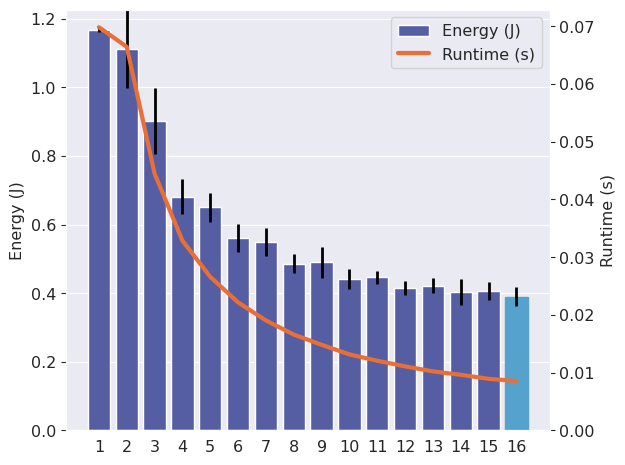

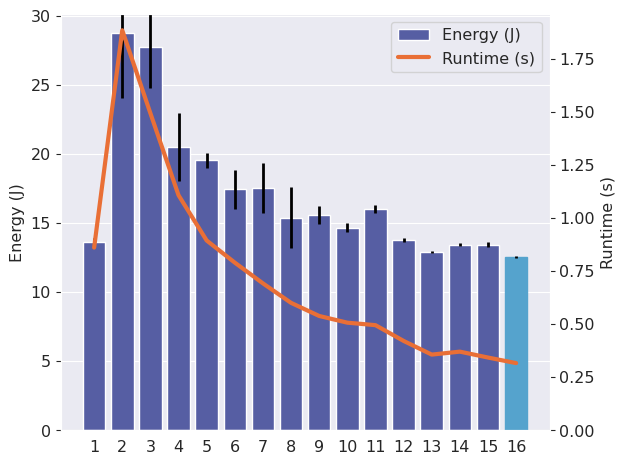

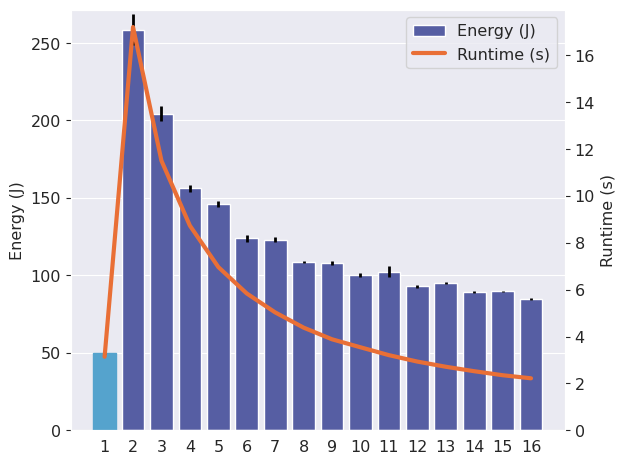

In [4]:
twin_plot(df_matmul[df_matmul['size'] == 500], '500x500 matrix multiplication')
plt.savefig('images/matmul_500.png')
plt.show()

twin_plot(df_matmul[df_matmul['size'] == 1000], '1000x1000 matrix multiplication')
plt.savefig('images/matmul_1000.png')
plt.show()

twin_plot(df_matmul[df_matmul['size'] == 1500], '1500x1500 matrix multiplication')
plt.savefig('images/matmul_1500.png')
plt.show()

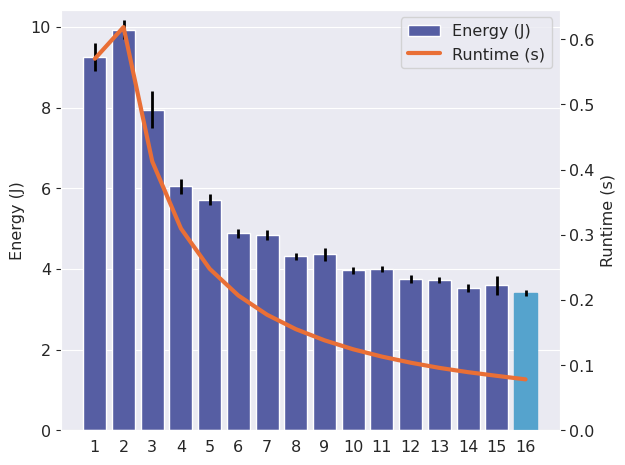

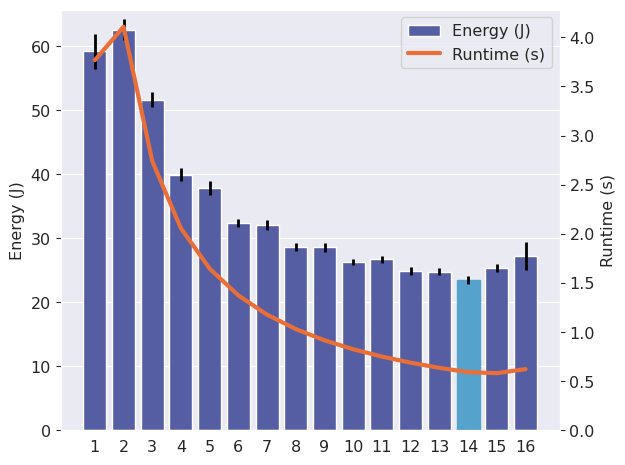

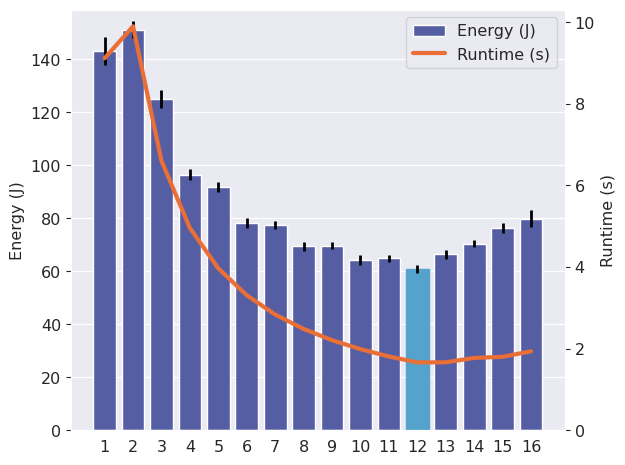

In [5]:
twin_plot(df_relax[df_relax['size'] == 10000], '10000x10000 nine-point stencil')
plt.savefig('images/stencil_10000.png')
plt.show()

twin_plot(df_relax[df_relax['size'] == 25000], '25000x25000 nine-point stencil')
plt.savefig('images/stencil_25000.png')
plt.show()

twin_plot(df_relax[df_relax['size'] == 40000], '40000x40000 nine-point stencil')
plt.savefig('images/stencil_40000.png')
plt.show()

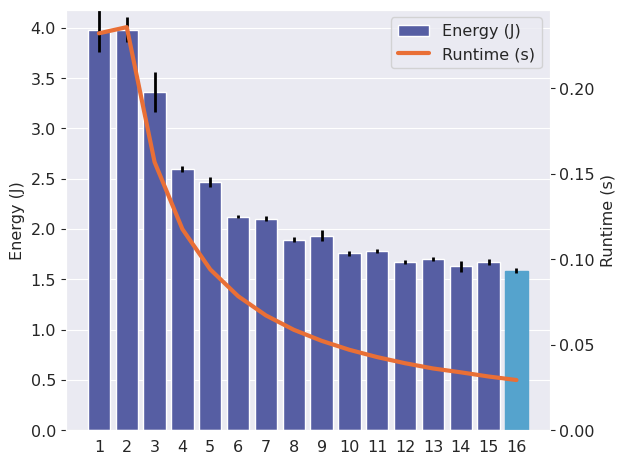

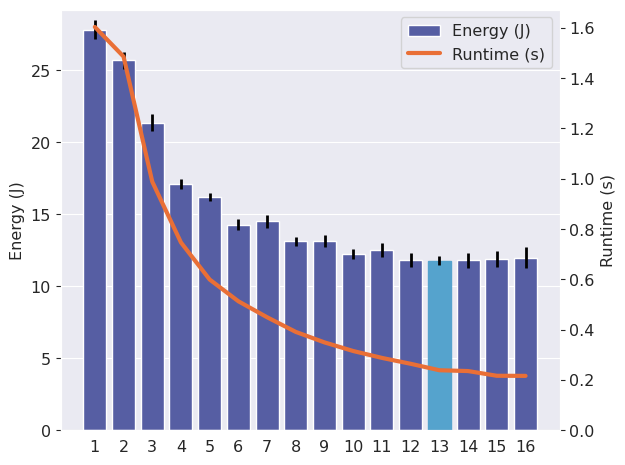

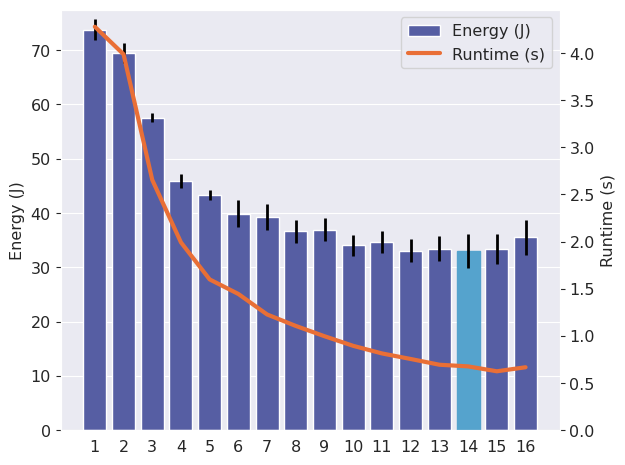

In [6]:
twin_plot(df_nbody[df_nbody['size'] == 10000], '10000 N-body')
plt.savefig('images/nbody_10000.png')
plt.show()

twin_plot(df_nbody[df_nbody['size'] == 25000], '25000 N-body')
plt.savefig('images/nbody_25000.png')
plt.show()

twin_plot(df_nbody[df_nbody['size'] == 40000], '40000 N-body')
plt.savefig('images/nbody_40000.png')
plt.show()